# <span style="color:blue"> <span style="font-family:Times New Roman">California Housing Price Prediction</span></span>


## <span style="font-family:Times New Roman"> Python : California Housing Prices</span>

### <span style="font-family:Times New Roman">Domain: Finance and Housing</span>

Source :[Machine-Learning Regression Dataset.](https://raw.githubusercontent.com/gurupratap-matharu/machine-learning-regression/master/dataset/housing.csv)

# <span style="font-family:Times New Roman">Background of the problem statement</span>

<p style="font-size:18px"><span style="font-family:Times New Roman">The task is to build a model of housing prices in California using the California census dataset. This data has metrics such as the population, median income, median housing price, and so on for each block group (district) in California.</span></p>

<p style="font-size:18px"><span style="font-family:Times New Roman">We need to predict district’s median housing prices. Thus, we need to train a model to predict a district's median housing price based on other data of the district. We will use the census data for this purpose.</span></p>

<p style="font-size:18px"><span style="font-family:Times New Roman">So the task at hand is clearly a typical supervised learning task. Moreover, it is also a multivariate regression task, since we are asked to predict a value. We will be using Root Mean Square Error (RMSE) as our performance measure.</span></p>



***

In [1]:
#import the necessary libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

matplotlib_axes_logger.setLevel('ERROR')
#%matplotlib notebook
%matplotlib inline



In [2]:
# Loading our dataset
df=pd.read_csv("https://raw.githubusercontent.com/gurupratap-matharu/machine-learning-regression/master/dataset/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


***

<p style="font-size:20px"><span style="font-family:Times New Roman">This data has metrics such as the population, median income, median housing price, and so on for each block group in California.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> A blockgroup typically has a population of 600 to 3,000 people.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">Let's just call them “districts” for short.</span></p>

In [4]:
#To get a quick desciption of the data, in particular the total number of rows, 
# and each attribute’s type and number of non-null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p style="font-size:18px"><span style="font-family:Times New Roman">There are <span style="color:blue"><b> 20,640</b></span> Rows in the dataset with 10 attributes. Notice that the <span style="color:blue"><b>total_bedrooms</b></span> attribute has only<span style="color:blue"><b> 20,433</b></span> non-null values, meaning that <span style="color: blue"><b>207</b></span> districts are missen from this feature. All attributes are numerical, except the ocean_proximity field.</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman">The description of each attributes given by Kaggle is as below </span>

<p style="font-size:20px"><span style="font-family:Times New Roman">* longitude: A measure of how far west a house is; a higher value is farther west</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* latitude: A measure of how far north a house is; a higher value is farther north</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* housing_median_age: Median age of a house within a block; a lower number is a newer building</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* total_rooms: Total number of rooms within a block</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* total_bedrooms: Total number of bedrooms within a block</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* population: Total number of people residing within a block</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* households: Total number of households, a group of people residing within a home unit, for a block</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* median_house_value: Median house value for households within a block (measured in US Dollars)</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* ocean_proximity: Location of the house w.r.t ocean/sea</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">Among these, “median_house_value” is the response variable and others will be the covariates.</span></p>

***

<p style="font-size:18px"><span style="font-family:Times New Roman">Total_bedrooms columns is having <span style="color:blue"><b>207</b></span> missing values,
Now we need to impute the missing values</span></p>

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

***

<p style="font-size:18px"><span style="font-family:Times New Roman">We see that there are 207 null values in Column total_bedrooms. We replace the null values with the mean and check for nulls again.</span></p>

In [6]:
#statistics for missing values
print ("Total_bedrooms column Mode is  "+str(df["total_bedrooms"].mode())+"\n")
print(df["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
dtype: float64

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


<AxesSubplot:>

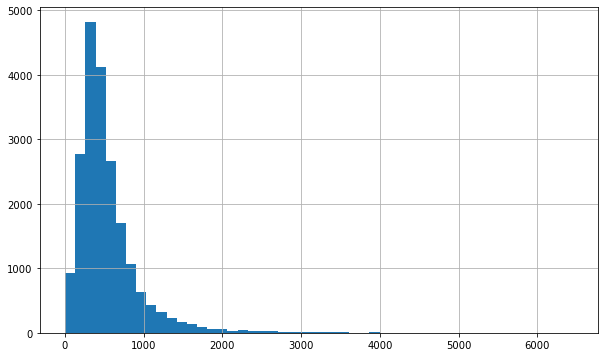

In [7]:
total_bedroms = df[df["total_bedrooms"].notnull()]["total_bedrooms"]#["total_bedrooms"]
total_bedroms.hist(figsize=(10,6),bins=50)

In [8]:
print(df.iloc[:,4:5].head())
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:,4:5])
df.iloc[:,4:5] = imputer.transform(df.iloc[:,4:5])
df.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

***

# <span style="font-family:Times New Roman">Encode Categorical Data :</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> Convert categorical column in the dataset to numerical data.</span></p>

In [9]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# To undestand the summary of the numerical attributes.
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


***

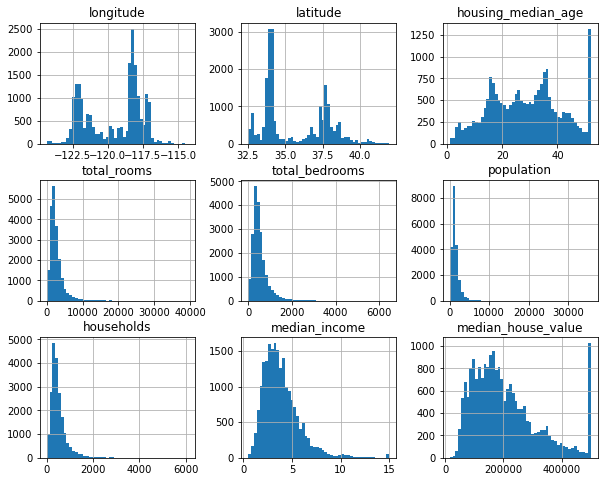

In [11]:
# To plot a histogram to understand the data
df.hist(bins=50, figsize=(10,8))
plt.savefig("attribute_histogram_plots.png")
plt.show()

<p style="font-size:18px"><span style="font-family:Times New Roman"> Nice! we can see each feature of our data-set as a histogram.</span></p>

***

# <span style="font-family:Times New Roman">Comment About Each Feature</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">*  Households — Most districts have around 100–500 households. peak is around 4800</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*  Housing median age — well, not very bell-shaped, at 35 and 15 are two peaks. are these years? max peak is at 50. does this mean major houses in each district are more than 50 years old?!?</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*  Latitude — Looks correct, at 34 and 37 degrees of latitude are major houses.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*  Longitude — The same, at -122 and -118 degrees are major houses</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*  Median house value — This is what i need to predict. somewhat bell-shaped, at extreme right there is a surge, is y-axis dollars? does this mean most houses are above 500,000?</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*  Median income — Very bell-shaped, good distribution, but is this income in dollars? There is no income above 15 so some capping has been done. most people have income between 2–5</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*  Population — Most districts have population below 3000</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*  Bedrooms — We have got bedrooms for a district? looks like most districts have between 300–600 bedrooms</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*  Total rooms — Again similar to the previous two. most districts have around 3000 rooms</span></p> </span></p>


In [12]:
hcorr = df.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


***

# <span style="font-family:Times New Roman"> Viewing Correlations</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">To see how closely each feature is associated with the others, we make a Correlation plot, which shows how strong the monotonic relationship between paired values is, and view the results.</span></p>

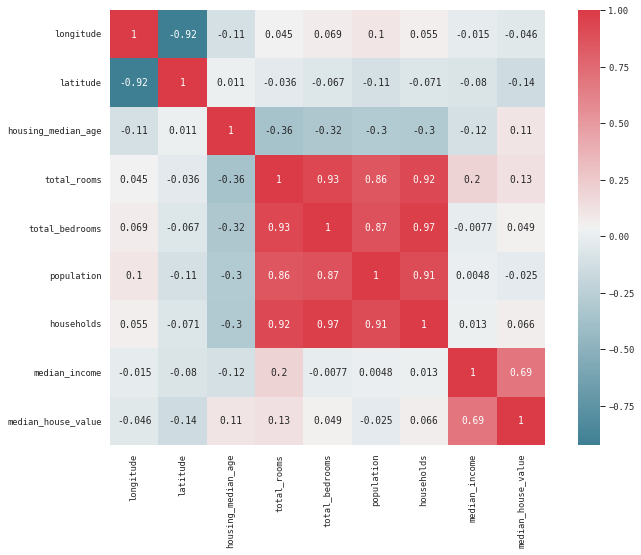

In [13]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
df_corr_matrix = df.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(df_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

<p style="font-size:20px"><span style="font-family:Times New Roman"> It is important to note that the values lie within the range of -1 to +1, where values closer to 0 indicate no correlation while values closer to ±1 indicate a high linear correlation. Here, the red-Raspberry Red and gray-aqua boxes indicate high correlation while the ones closer to white show low to no correlation.</span></p>

***

#  <span style="font-family:Times New Roman">Pre-process the data</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">Some expert will tells us that median income is a very important parameter on how to find out house prices. We observe that the median income data is continuous. So let’s make it discrete</span></p>


<p style="font-size:20px"> <span style="font-family:Times New Roman"> Creating a test set</p></span>

<p style="font-size:20px"><span style="font-family:Times New Roman"> We select random 20% of dataset as a test set using Scikit-Learn's train_test_split function.</span></p>

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,537.870553,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,537.870553,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,537.870553,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,537.870553,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,537.870553,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


***

In [16]:
# The median income is a very important attribute to predict median housing prices.
# We need to ensure that the test set is representative of the various categories of incomes in the whole dataset.
# Therefore, we are creating an income category column to divide median_income in different categories (5 here)

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

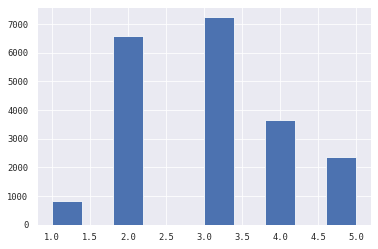

In [17]:
df["income_cat"].hist()

# <span style="font-family:Times New Roman">Stratified Sampling on Dataset</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">Now the next step is to perform some stratified sampling on the dataset. The reason for stratified sampling is, it will enable us to sample from a population that can be divided into a subset of the population. </span></p> 

<p style="font-size:20px"><span style="font-family:Times New Roman"><br>You are now ready to perform stratified sampling based on income category. For this you can use the StratifiedShuffleSplit class of Scikit-Learn:</span></p>

In [18]:
# Now we need to do stratified sampling based on the income category. 
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [19]:
# To check whether we have divided the instances in all the income categories proportionally.
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [20]:
# Drop the income_cat column from the datasets
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<p style="font-size:20px"><span style="font-family:Times New Roman">We can now Discover and visualize the data to get more insight.</span></p>

***

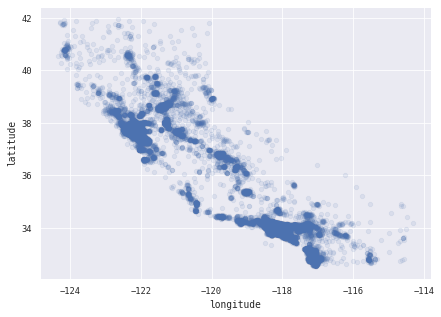

In [21]:
df = strat_train_set.copy()
df.plot(kind="scatter", x="longitude", y="latitude", figsize = (7,5), alpha=0.1)
plt.savefig("visualization_plot.png")

<p style="font-size:20px"><span style="font-family:Times New Roman"> The plot shows density of houses respective to its longitude & latitude.</span>

***

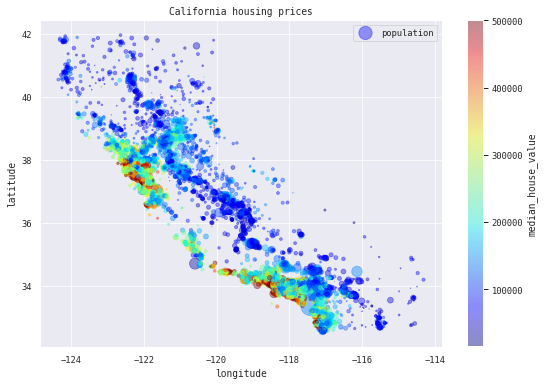

In [22]:
# Now let's take housing prices into consideration
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(9,6),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('California housing prices')
plt.legend()
plt.savefig("housing_prices_scatterplot.png")

<p style="font-size:20px"><span style="font-family:Times New Roman">- The radius of each circle represents the district’s population (s).</span>    
<p style="font-size:20px"><span style="font-family:Times New Roman">- The color represents the price (c).</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">- The graph shows house prices in california, where <span style="color:blue"> blue</span> is cheap and <span style="color:red">red</span> is expensive.</span>

***

#  <span style="font-family:Times New Roman">Finding Correlations</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">Since the dataset is not too large, you can easily calculate the standard correlation coefficient between each pair of attributes using the corr() method:</span></p>

In [23]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047581
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<p style="font-size:20px"><span style="font-family:Times New Roman">Correlation ranges are between -1 and 1. When it is close to 1 it means that there is a positive correlation and when it is close to -1 it means that there is a negative correlation. When it is close to 0, it means that there is no linear correlation.

<p style="font-size:20px"><span style="font-family:Times New Roman">Another way to check the correlation between attributes is to use the pandas scatter_matrix() function, which plots each numeric attribute against every other numeric attribute:</span></p>

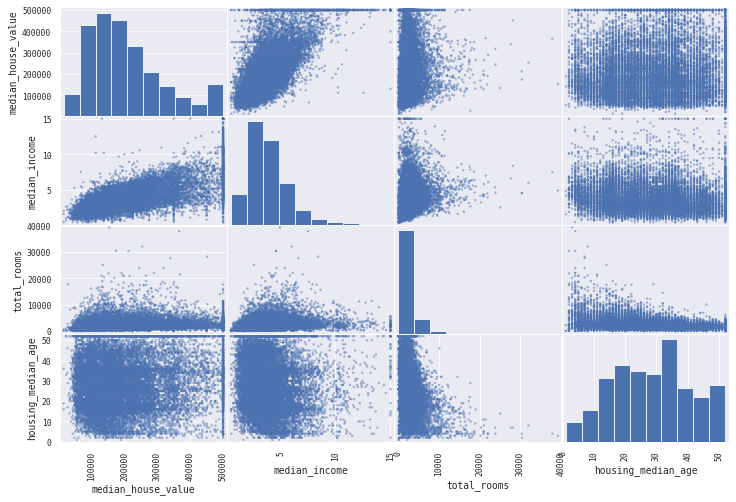

In [24]:
# Using the corr_matrix, we can see the attributes that are likely to be correlate. 

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot.png")

<p style="font-size:20px"><span style="font-family:Times New Roman">And now let’s look at the correlation matrix again by adding three new columns to the dataset; rooms per household, bedrooms per room and population per household:</span></p>

In [25]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047581
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.219853
Name: median_house_value, dtype: float64

<p style="font-size:20px"><span style="font-family:Times New Roman"> * See these three attributes above = total_rooms, total_bedrooms and population</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman"> * They are for an entire district. It would be nice to find them for a household. Why?</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman"> * Because We are calculating, per house price. 

<p style="font-size:20px"><span style="font-family:Times New Roman"> * So let’s do that</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman"> * So basically we are deriving new attributes from existing attributes in our dataset</span></p>

***

<p style="font-size:20px"><span style="font-family:Times New Roman">Let's focus on the correlation between median house value and the median house income, from which it is very easy to see the strong correlation, that confirms that those with higher incomes have houses at higher values.
</span></p>

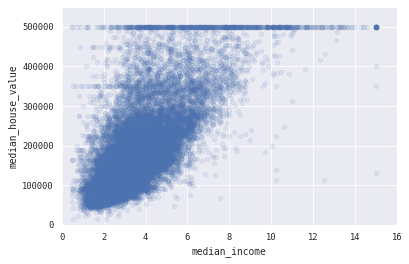

In [26]:
# The median house value seems to be highly correlated to the median_income among others.

df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.savefig("income_vs_house_value_scatterplot.png")

# <span style="font-family:Times New Roman"> Observations from the scatter plot:</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">* The correlation is indeed very strong, you can clearly see the upward trend and the points are not too dispersed.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* The price cap that we noticed earlier is clearly visible as a horizontal line at USD 500,000.
<p style="font-size:20px"><span style="font-family:Times New Roman">* There is less obvious straight lines at USD 450,000 & USD 350,000.</span></p>




***

<p style="font-size:20px"><span style="font-family:Times New Roman"> Now the total number of rooms or bedrooms in a district is not very useful. <br>The number of rooms per household, bedrooms per rooms and population per household are more useful attributes.</span></p>

***

In [27]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333


***

***

#  <span style="font-family:Times New Roman"><span style="color:blue"> Data Cleaning</span></span>

<p style="font-size:18px"><span style="font-family:Times New Roman">* Do you remember at the begining our total_bedrooms had some missing values?</span></p>

<p style="font-size:18px"><span style="font-family:Times New Roman">* And the missing value was only one attribute, but we cannot be too sure that there won’t be any missing values in the new data. <p style="font-size:18px"><span style="font-family:Times New Roman">* Therefore, we use Scikit-Learn's Imputer function to take care of all the missing values.</span></p>

<p style="font-size:18px"><span style="font-family:Times New Roman"> We can fix this in 3 ways</span></p>
<p style="font-size:18px"><span style="font-family:Times New Roman">1. Remove the instances(rows) of missing values</span></p>
<p style="font-size:18px"><span style="font-family:Times New Roman">2. Remove the entire attribute or</span></p>
<p style="font-size:18px"><span style="font-family:Times New Roman">3. Set missing value to some value like zero, median or mean</span></p>


<p style="font-size:20px"><span style="font-family:Times New Roman"><span style="color:red">Our Best bet would be option 3 and we will put in the median value using the SimpleImputer method like this</span></span></p>

***

In [28]:
#housing.dropna(subset=["total_bedrooms"]) # option 1
#housing.drop("total_bedrooms", axis=1) # option 2
#housing["total_bedrooms"].fillna(housing["total_bedrooms"].median()) # option 3

# We are using Scikit-Learn's Imputer function here.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

#Remove the text attribute because median can only be calculated on numerical attributes
df_num = df.drop('ocean_proximity', axis=1)

imputer.fit(df_num)

# The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable.
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.36000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03184185e-01,  2.81766108e+00])

In [29]:
# The trained imputer can transform the training set by replacing missing values by the learned medians
X = imputer.transform(df_num)

In [30]:
# X is a Numpy Array, change it to dataframe using pandas DataFrame function. 
df_tr = pd.DataFrame(X, columns=df_num.columns,index=df.index)
df_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241


***

##  <span style="font-family:Times New Roman">Label encode for categorical feature (ocean_proximity)</span>

In [31]:
labelEncoder = LabelEncoder()
print(df["ocean_proximity"].value_counts())
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])
df["ocean_proximity"].value_counts()
df.describe()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.942923,1419.687379,497.011810,3.875884,207005.322372,1.169029,5.440406,0.214391,3.096469
std,2.001828,2.137963,12.574819,2138.417080,410.686527,1115.663036,375.696156,1.904931,115701.297250,1.420394,2.611696,0.070340,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000,1.130435,0.045937,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950,119800.000000,0.000000,4.442168,0.175260,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,436.000000,1164.000000,408.000000,3.541550,179500.000000,1.000000,5.232342,0.203184,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325,263900.000000,1.000000,6.056361,0.240269,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,4.000000,141.909091,3.492666,1243.333333


## Split the dataset into 80% train and 20% test datase

In [32]:
df_ind = df.drop("median_house_value",axis=1)
print(df_ind.head())
df_dep = df["median_house_value"]
print("Medain Housing Values")
print(df_dep.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  ocean_proximity  \
12655      2237.0       706.0         2.1736                1   
15502      2015.0       768.0         6.3373                4   
2908        667.0       300.0         2.8750                1   
14053       898.0       483.0         2.2264                4   
20496      1837.0       580.0         4.4964                0   

       rooms_per_household  bedrooms_per_room  population_per_household  
12655             5.485836           0.205784               

In [33]:
#check for rand_state
X_train,X_test,y_train,y_test = train_test_split(df_ind,df_dep,test_size=0.2,random_state=42)
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (13209, 12) and size 158508
X_test shape (3303, 12) and size 39636
y_train shape (13209,) and size 13209
y_test shape (3303,) and size 3303


In [34]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
16674,-120.66,35.20,13.0,5138.0,713.0,1838.0,645.0,5.9676,4,7.965891,0.138770,2.849612
4324,-118.35,34.08,52.0,1710.0,350.0,727.0,355.0,4.5833,0,4.816901,0.204678,2.047887
5756,-118.29,34.18,52.0,1602.0,265.0,667.0,251.0,5.0490,0,6.382470,0.165418,2.657371
3243,-119.57,36.10,16.0,1461.0,400.0,1201.0,384.0,1.5727,1,3.804688,0.273785,3.127604
8155,-118.10,33.82,36.0,1946.0,346.0,871.0,336.0,5.2155,0,5.791667,0.177801,2.592262


***

# Handling Text and Categorical Attributes
<p style="font-size:20px"><span style="font-family:Times New Roman">The categorical attribute ocean_proximity needs to be taken care of. We change the text labels to numbers using Scikit-Learn's OrdinalEncoder function. It encode categorical features as an integer array.</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman"> Further, we use OneHotEncoder encoder to convert integer categorical values into one-hot vectors to create one binary attribute per category.</span></p>

In [35]:
from sklearn.preprocessing import OneHotEncoder

df_cat = df[["ocean_proximity"]]
cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

***

# <span style="font-family:Times New Roman">In Machine Learning We Repeat Certain Procedures Like</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * Data cleaning and removing null values</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * Deriving attributes</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * Transforming data</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * Processing numerical and categorial data separately</span></p>


# <span style="font-family:Times New Roman">To save time we can join these chunks and form a solid pipeline! So anytime if</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">* There are changes</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* We want to play around with our model</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* If input data has changed</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* We want to try different things</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman"> We can just run our pipeline.</span></p>

# <span style="font-family:Times New Roman">This part of the project can be a little bit tedious. To achieve this, we will</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">1. Define the individiual components of the pipeline</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">2. Combine them using Feature Union
</span></p>


***

# <span style="font-family:Times New Roman">Let's Start</span>

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
# this component gives us the flexibility to add extra attributes to our pipeline
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
# this component allows us to select entire or partial dataframe
# or in simpler words we can tell which attributes we want in our pipeline
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):return self
    
    def transform(self, X):return X[self.attribute_names].values

# <span style="font-family:Times New Roman">Label Binarizer converts
<p style="font-size:20px"><span style="font-family:Times New Roman">* Text to integers</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Integers to one hot vectors</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Think of one hot vectors as an array which has all 0’s but only one 1</span></p>




In [37]:
class MyLabelBinarizer(TransformerMixin):
    
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):return self.encoder.transform(x)

***

<p style="font-size:20px"><span style="font-family:Times New Roman">1. Our individual components is done!</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">2. Let’s separate our numerical and categorical attributes and Then
<p style="font-size:20px"><span style="font-family:Times New Roman">3. Let’s define our final pipeline like this</span></p>

In [38]:
num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
df_extra_attribs = attr_adder.transform(df.values)


# <span style="font-family:Times New Roman">Components to add to our numerical pipeline, will be

<p style="font-size:20px"><span style="font-family:Times New Roman">1. DataFrameSelector — to chose the attributes we want</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">2. SimpleImputer —   to fill NA values with median</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">3. CombinedAttributesAdder — Our custom class to add new attributes to our model</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">4. Std Scaler — to bring all attributes to the same level.</span></p>

In [39]:
# our numerical pipeline
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_attribs)),
                    ('imputer', SimpleImputer(strategy="median")),
                    ('attribs_adder', CombinedAttributesAdder()),
                    ('std_scaler', StandardScaler()),
                ])

<p style="font-size:20px"><span style="font-family:Times New Roman">
Similar procedure for our categorical pipeline. The label binarizer converts categorical labels to numerical data.</span></p>


In [40]:
# our categorical pipeline
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

<p style="font-size:20px"><span style="font-family:Times New Roman">The components of our full pipeline are pipelines themselves! This is powerful and complex.</span></p>

In [41]:
# our full pipeline
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

***

<p style="font-size:20px"><span style="font-family:Times New Roman">Let's prepare our entire training dataset with our pipeline? Here we get our transformed data after passing it through the full pipeline.</span></p>

In [42]:
df_prepared=full_pipeline.fit_transform(df)

<p style="font-size:20px"><span style="font-family:Times New Roman">BAM!!! We get array of floating digits.</span></p>

In [43]:
df_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

***

# <span style="font-family:Times New Roman"> How far are we in our project</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * We Got our dataset.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * We studied and understood it.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * We visualized it.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * we splitted it into train and test.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * We Created our pipelines.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> * We transformed our housing data.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">So now we have our data all ready and prepared to be fed to  Machine Learning model</span></p>

***

# <span style="font-family:Times New Roman">Prediction Models Creation</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> Now we will analyze 5 different types of Regression models and we will chose the best one among them, after viewing the RMSE values of each one.</span></p>




<p style="font-size:20px"><span style="font-family:Times New Roman"><b>Root Mean Squared Error</b></span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">We can now test the accuracy of the model with Root Mean Square Error (RMSE). Variables:<span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman">m - is the number of instances we are testing, i.e. 2000 users of the website</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">h - is your systems prediction function, i.e. h(x^i) = 100 but the actual value is 98 than you have a difference of 2
<p style="font-size:20px"><span style="font-family:Times New Roman">y - is your actual value</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">\begin{equation}\label{eq:} RMSE = \sqrt{\frac{1}{m}\Sigma_{i=1}^{m}{\Big(h\Big(x^i\Big)-y^i}\Big)^2} \end{equation}
\labeleq:RMSE= 
m
1
​
 Σ 
i=1
m
​
 (h(x 
i
 )−y 
i
 ) 
2</span></p>
 
​
 
​
  


<p style="font-size:20px"><span style="font-family:Times New Roman"><span style="color:blue"> Now We got some output.</span></span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* But how do we know, how good this model is?</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* By finding the root mean squared error between predictions and actuals</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* It measures the standard deviation of the errors the system makes in its predictions.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* For example, an RMSE of 50,000 means that about 68% of the system’s predictions fall within 50,000 of the actual value</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">*and about 95% of the predictions fall within 100,000 of the actual value.</span></p>

# <span style="font-family:Times New Roman">Perform Linear Regression</span>

In [44]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is -3710564.507141976
coefficients  is [-4.37749978e+04 -4.35947176e+04  1.14707668e+03 -5.95118002e+00
  3.33205996e+01 -3.99393726e+01  1.29271964e+02  3.93948221e+04
 -3.30238970e+02  3.75941234e+03  9.98653717e+04  8.91757533e+01]


***

In [45]:
#predict on the test data
y_pred = linearRegModel.predict(X_test)

In [46]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

3303
3303
[116825.46409336 203822.2127451  226387.90094419  77148.97839153
 271275.2927217 ]
2924      57800.0
11713    176600.0
7005     159200.0
9254      55000.0
11392    222500.0
Name: median_house_value, dtype: float64


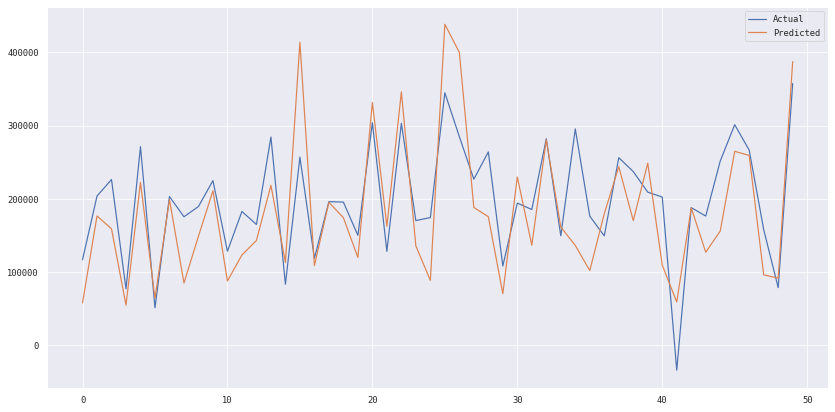

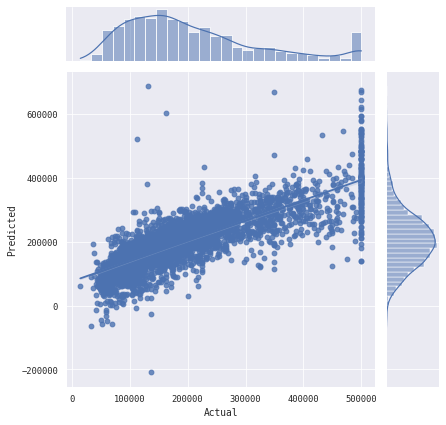

In [47]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(14,7))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

# Root Mean Squared Error (RMSE

In [48]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

68939.26005561907
69765.07168492519


***



# <span style="font-family:Times New Roman"> Underfitting & Overfitting</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> Linear Regression We have a RMSE ~= 68,000, which is way too high in order for our model to be useful. You can take a look back at either our summery statistics or histograms to see that a significant majority of houses are valued under 300,000 which means a majority of the time we will most likely have major discrepancies. 
<p style="font-size:20px"><span style="font-family:Times New Roman">This means that we need to select a more powerful model in order to better fit the model. Let us try a Decision Tree.

***

# <span style="font-family:Times New Roman">Perform Decision Tree Regression</span>

<p style="font-size:20px"><span style="font-family:Times New Roman"> A decision tree is one of the predictive modeling approaches used in machine learning. Decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. It is one of the most widely used and practical methods for supervised learning. Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks.</span></p>


<p style="font-size:20px"><span style="font-family:Times New Roman">Perform Decision Tree Regression on training data. Predict output for test dataset using the fitted model.</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman">Print root mean squared error from Decision Tree Regression.</span></p>

In [49]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [50]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([ 73596.18706697, 446400.        , 199433.89830508, ...,
       281514.28571429,  73596.18706697, 205579.7752809 ])

In [51]:
print(len(dtReg_y_pred))
print(len(y_test))
print(dtReg_y_pred[0:5])
print(y_test[0:5])

3303
3303
[ 73596.18706697 446400.         199433.89830508  73596.18706697
 232303.1719457 ]
2924      57800.0
11713    176600.0
7005     159200.0
9254      55000.0
11392    222500.0
Name: median_house_value, dtype: float64


<p style="font-size:20px"><span style="font-family:Times New Roman"> Print root-mean-squared error from Decision Tree Regression.</span></p>

In [52]:
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

63675.32173261135
69765.07168492519


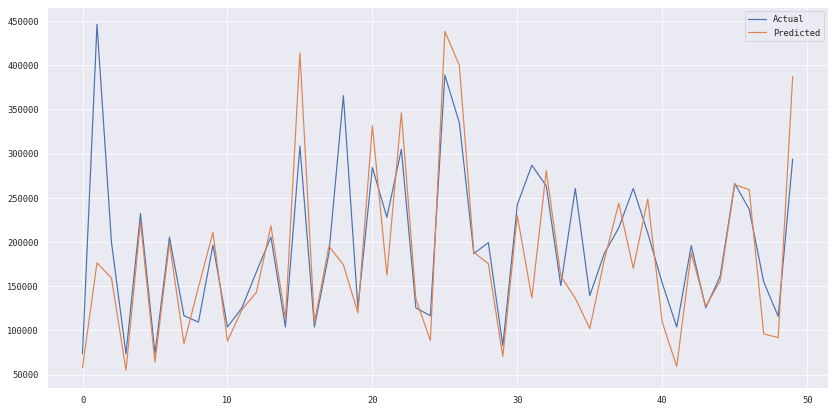

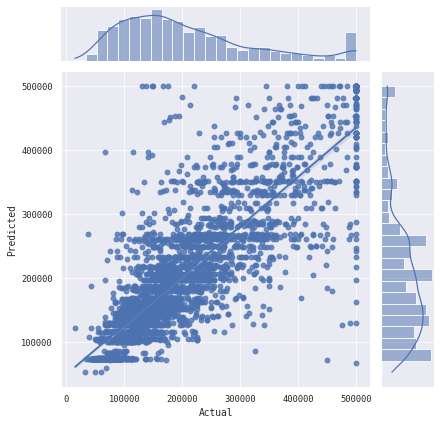

In [53]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(14,7))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

***

# <span style="font-family:Times New Roman">Perform Random Forest Regression</span>
<p style="font-size:20px"><span style="font-family:Times New Roman"> Random Forest Regression is a supervised learning Algorithm that operates by constructing random decision trees. Its output means to increase accuracy and control overfitting. The prediction is more accurate than a single model.</span></p>



In [54]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [55]:
rfReg_y_pred = rfReg.predict(X_test)
print(len(rfReg_y_pred))
print(len(y_test))
print(rfReg_y_pred[0:5])
print(y_test[0:5])

3303
3303
[ 54860.         345430.23333333 178693.33333333  68680.
 269543.36666667]
2924      57800.0
11713    176600.0
7005     159200.0
9254      55000.0
11392    222500.0
Name: median_house_value, dtype: float64


<p style="font-size:20px"><span style="font-family:Times New Roman">We perform Random Forest Regression on training data and predict the output for the test dataset using the fitted model. We next print root-mean-squared error from Random Forest Regression.</span></p>

In [56]:
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

51635.27890811491
69765.07168492519


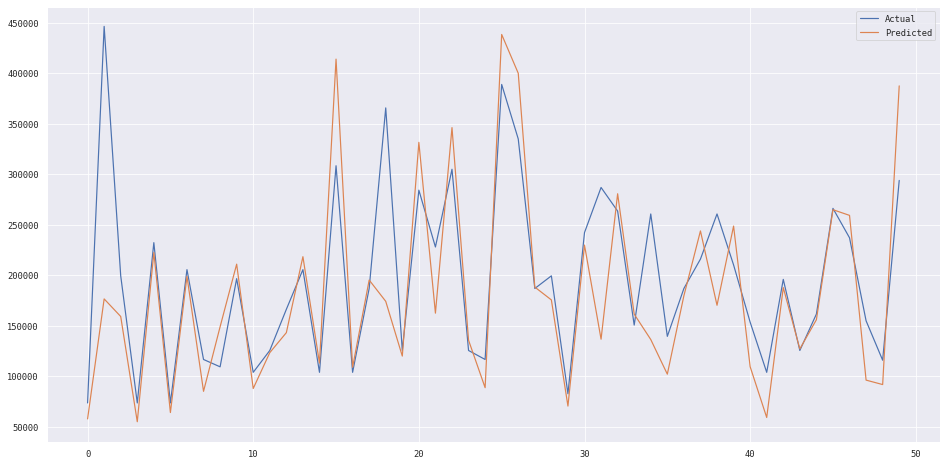

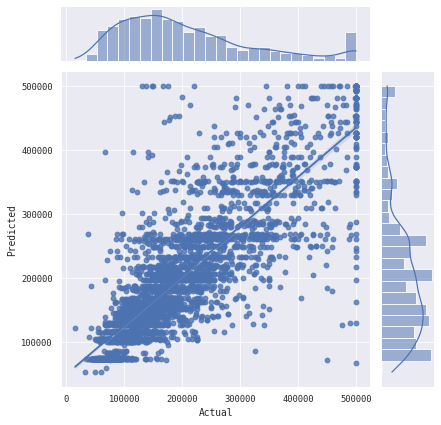

In [57]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

***

# <span style="font-family:Times New Roman">Perform Lasso Regression (determine which variables should be retained in the model):</span>
<p style="font-size:20px"><span style="font-family:Times New Roman">1.Perform Lasso Regression on training data.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">2.Predict output for test dataset using the fitted model.</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">3.Print RMSE (root mean squared error) from Lasso Regression.</span></p>

In [58]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))


69765.07168520137
0.6376861053458043


***

# <span style="font-family:Times New Roman">Performing Linear Regression with one independent Variable</span>

<p style="font-size:16px"><span style="font-family:Times New Roman"> Extract just the median_income column from the independent variables (from X_train and X_test). Perform Linear Regression to predict housing values based on median_income. Predict output for test dataset using the fitted model. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.</span></p>

In [59]:
#Extract median_income 
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
print(dropcol)
df_med = df_ind.drop(dropcol,axis=1)
print(type(df_med))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']
<class 'pandas.core.frame.DataFrame'>


In [60]:
#check for rand_state
X_train2,X_test2,y_train2,y_test2 = train_test_split(df_med,df_dep,test_size=0.2,random_state=42)
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())
print("X_train2 shape {} and size {}".format(X_train2.shape,X_train2.size))
print("X_test2 shape {} and size {}".format(X_test2.shape,X_test2.size))
print("y_train2 shape {} and size {}".format(y_train2.shape,y_train2.size))
print("y_test2 shape {} and size {}".format(y_test2.shape,y_test2.size))

X_train2 shape (13209, 4) and size 52836
X_test2 shape (3303, 4) and size 13212
y_train2 shape (13209,) and size 13209
y_test2 shape (3303,) and size 3303


In [61]:
linReg2 = LinearRegression()
linReg2.fit(X_train2,y_train2)

LinearRegression()

In [62]:
y_pred2 = linReg2.predict(X_test2)
print(len(y_pred2))
print(len(y_test2))
print(y_pred2[0:5])
print(y_test2[0:5])

3303
3303
[116927.87069445 263797.44069812 222176.00015686 111254.65972445
 277474.05069244]
2924      57800.0
11713    176600.0
7005     159200.0
9254      55000.0
11392    222500.0
Name: median_house_value, dtype: float64


Text(0, 0.5, ' Predicted median_house_value')

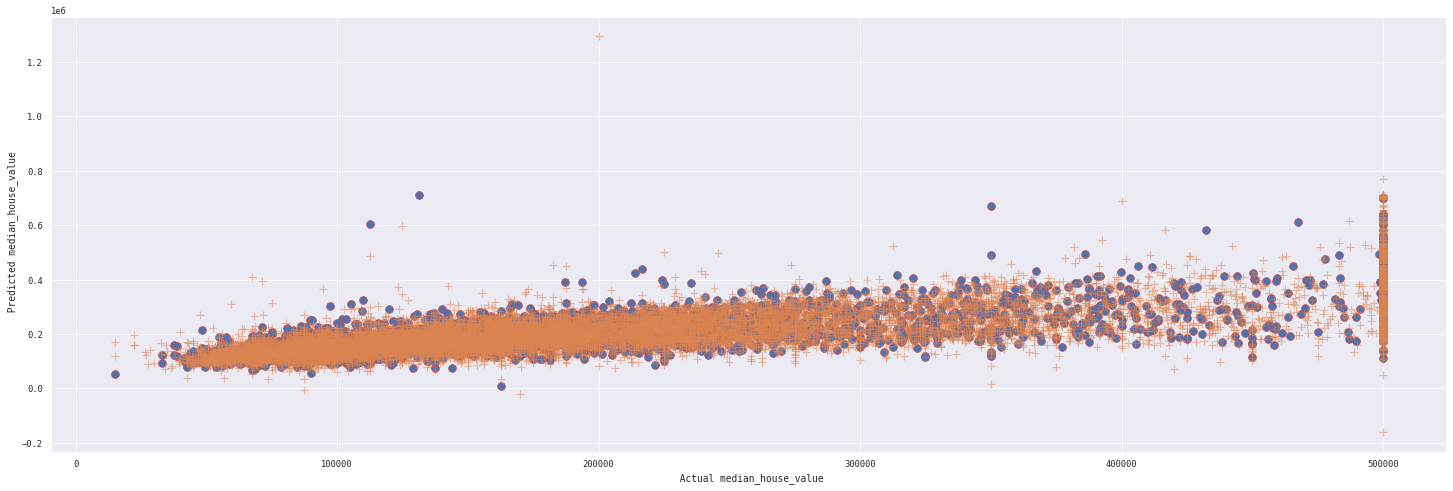

In [63]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,linReg2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

# <span style="font-family:Times New Roman"><span style="color:blue"><b>Conclusion</b></span></span>
 
<p style="font-size:20px"><span style="font-family:Times New Roman">Different regression models were evaluated based on the RMSE values and it’s observed that Random Forest Regression best fits the data compared to all the other methods.
<p style="font-size:20px"><span style="font-family:Times New Roman">We can also observe that a perfect linear model is not a good approximation for the given data set.
<p style="font-size:20px"><span style="font-family:Times New Roman">The reason behind the performance of respective models for the given data can be further understood by looking at the relationship between the observed and target variables.</span></p>



***

# <span style="font-family:Times New Roman"> Fine tune our model with Hyper parameters

<p style="font-size:20px"><span style="font-family:Times New Roman">* We can do optimization on our model by tweaking Hyper-parameters</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Think of hyper parameters as “knobs” that you turn to optimize output</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* We can do it manually but we’ll use an automatic scikit learn GridSearchCV tool for this</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* We’ll apply it on our RandomForest model</span></p>

In [64]:
df = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
df_labels = strat_train_set["median_house_value"].copy()

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

<p style="font-size:20px"><span style="font-family:Times New Roman">The best hyperparameter combination found:</span></p>

In [67]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [68]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

34440.82396616079 {'max_features': 2, 'n_estimators': 3}
27132.599412574866 {'max_features': 2, 'n_estimators': 10}
26394.425719921837 {'max_features': 2, 'n_estimators': 30}
18032.343092018273 {'max_features': 4, 'n_estimators': 3}
14478.06767700421 {'max_features': 4, 'n_estimators': 10}
13492.425127956727 {'max_features': 4, 'n_estimators': 30}
12880.342057601945 {'max_features': 6, 'n_estimators': 3}
9931.637150573726 {'max_features': 6, 'n_estimators': 10}
8163.471331525187 {'max_features': 6, 'n_estimators': 30}
7500.354219253615 {'max_features': 8, 'n_estimators': 3}
5227.173949334454 {'max_features': 8, 'n_estimators': 10}
4175.919448232683 {'max_features': 8, 'n_estimators': 30}
33403.96375277891 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
24941.083028708843 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
24281.891133997528 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
19907.908556536826 {'bootstrap': False, 'max_features': 3, 'n_estimat

<p style="font-size:20px"><span style="font-family:Times New Roman">Look for the minimum value</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">I’m getting at 41,750 with max_features=8, n_estimators=30</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman"> Without fine-tuning we had got 51,356 so there has been improvement</span></p>

<p style="font-size:20px"><span style="font-family:Times New Roman"><span style="color:blue"><b>We have Fine tuned our model. </span>

***


<p style="font-size:20px"><span style="font-family:Times New Roman"><b>This DataFrame shows how our machine learning model is progressing over different Hyper Parameters </b></span></p>

In [70]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.082560,0.009912,0.005389,0.001854,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.024485e+09,-1.453870e+09,...,-1.186170e+09,1.443180e+08,18,-3.343985e+08,-4.581192e+08,-3.682685e+08,-3.740784e+08,-4.028951e+08,-3.875519e+08,4.145800e+07
1,0.280366,0.052203,0.012766,0.001313,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-6.661140e+08,-8.672550e+08,...,-7.361780e+08,7.347606e+07,16,-1.514796e+08,-1.921006e+08,-1.678255e+08,-1.673007e+08,-1.761099e+08,-1.709633e+08,1.323743e+07
2,0.728180,0.021834,0.031104,0.001708,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-5.700157e+08,-7.310993e+08,...,-6.966657e+08,6.780243e+07,15,-9.701714e+07,-1.261518e+08,-1.197257e+08,-1.246337e+08,-1.250290e+08,-1.185115e+08,1.097100e+07
3,0.110119,0.001565,0.003989,0.000629,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-4.645721e+08,-3.110200e+08,...,-3.251654e+08,8.047370e+07,11,-1.454085e+08,-1.069328e+08,-1.114246e+08,-9.369223e+07,-7.704286e+07,-1.069002e+08,2.266837e+07
4,0.381127,0.010957,0.012166,0.002475,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.722083e+08,-2.102349e+08,...,-2.096144e+08,3.499316e+07,9,-6.590155e+07,-5.475509e+07,-4.420601e+07,-5.087053e+07,-5.135808e+07,-5.341825e+07,7.116468e+06
5,1.237830,0.109855,0.037618,0.006697,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.924457e+08,-1.803081e+08,...,-1.820455e+08,5.679781e+06,7,-3.455601e+07,-3.667547e+07,-3.539766e+07,-3.410194e+07,-3.446303e+07,-3.503882e+07,9.219296e+05
6,0.184869,0.020624,0.004784,0.000746,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.460335e+08,-2.043995e+08,...,-1.659032e+08,3.073549e+07,6,-4.788650e+07,-6.951157e+07,-5.417290e+07,-4.572575e+07,-6.465860e+07,-5.639106e+07,9.289746e+06
7,0.529752,0.092594,0.010193,0.000389,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-9.669938e+07,-1.007810e+08,...,-9.863742e+07,6.201381e+06,5,-2.563784e+07,-2.798229e+07,-2.384507e+07,-2.628539e+07,-2.802277e+07,-2.635467e+07,1.565148e+06
8,1.574371,0.097542,0.031723,0.002032,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-7.321019e+07,-6.405654e+07,...,-6.664226e+07,8.290139e+06,4,-1.474305e+07,-1.423957e+07,-1.221418e+07,-1.318766e+07,-1.498209e+07,-1.387331e+07,1.033713e+06
9,0.189744,0.014982,0.003783,0.000745,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-6.380078e+07,-7.145153e+07,...,-5.625531e+07,1.171412e+07,3,-2.015228e+07,-2.625659e+07,-1.619520e+07,-1.301821e+07,-2.086511e+07,-1.929748e+07,4.487107e+06


***

<p style="font-size:20px"><span style="font-family:Times New Roman"><b>If not sure which Hyper Parameter to pick then we use random search cv</b></span></p>

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_prepared, df_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015CE59EA850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015CE7EC32B0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [72]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4721.458046330797 {'max_features': 7, 'n_estimators': 180}
10472.570311072692 {'max_features': 5, 'n_estimators': 15}
18388.97803744942 {'max_features': 3, 'n_estimators': 72}
9670.389186045742 {'max_features': 5, 'n_estimators': 21}
4814.602698685222 {'max_features': 7, 'n_estimators': 122}
18228.864607362953 {'max_features': 3, 'n_estimators': 75}
17979.29339370909 {'max_features': 3, 'n_estimators': 88}
8971.127396268026 {'max_features': 5, 'n_estimators': 100}
17862.812041674322 {'max_features': 3, 'n_estimators': 150}
19097.958351290854 {'max_features': 5, 'n_estimators': 2}


In [73]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.57568218e-03, 5.92870293e-03, 4.85369161e-03, 1.22615644e-03,
       1.10552001e-03, 1.07812563e-03, 9.19474217e-04, 1.83815561e-01,
       6.50694331e-01, 6.83854349e-03, 4.59284492e-03, 1.26356108e-02,
       1.20325482e-02, 1.27587196e-02, 1.34590594e-02, 2.88034867e-03,
       7.83174763e-02, 2.91604303e-08, 1.18838107e-04, 1.68735683e-04])

***

# <span style="font-family:Times New Roman">Ideas that can improve this model</span>

<p style="font-size:20px"><span style="font-family:Times New Roman">* With time this model will become obsolete</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* So we will need to write some code to maintain it</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* Also over period of time, we will need to check the input data quality</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* We might need to make fresh models on newer data</span></p>
<p style="font-size:20px"><span style="font-family:Times New Roman">* I will keep a realistic timeline in mind. And add several months to the timeline because things can change for example new policies</span></p>